기본 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir datasets

In [3]:
!unzip '/content/drive/MyDrive/rainydataset.zip' -d '/content/datasets'

Archive:  /content/drive/MyDrive/rainydataset.zip
  inflating: /content/datasets/Cloud/cloud1.jpg  
  inflating: /content/datasets/Cloud/cloud10.jpg  
  inflating: /content/datasets/Cloud/cloud100.jpg  
  inflating: /content/datasets/Cloud/cloud101.jpg  
  inflating: /content/datasets/Cloud/cloud102.jpg  
  inflating: /content/datasets/Cloud/cloud103.jpg  
  inflating: /content/datasets/Cloud/cloud104.jpg  
  inflating: /content/datasets/Cloud/cloud105.jpg  
  inflating: /content/datasets/Cloud/cloud106.jpg  
  inflating: /content/datasets/Cloud/cloud107.jpg  
  inflating: /content/datasets/Cloud/cloud108.jpg  
  inflating: /content/datasets/Cloud/cloud109.jpg  
  inflating: /content/datasets/Cloud/cloud11.jpg  
  inflating: /content/datasets/Cloud/cloud110.jpg  
  inflating: /content/datasets/Cloud/cloud111.jpg  
  inflating: /content/datasets/Cloud/cloud112.jpg  
  inflating: /content/datasets/Cloud/cloud113.jpg  
  inflating: /content/datasets/Cloud/cloud114.jpg  
  inflating: /cont

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
DATASET_PATH = '/content/datasets'

In [6]:
original_cloud_dataset = [
    cv.imread(f'{DATASET_PATH}/Cloud/{name}')
    for name in os.listdir('/content/datasets/Cloud')
]

In [7]:
original_raincloud_dataset = [
    cv.imread(f'{DATASET_PATH}/RainCloud/{name}')
    for name in os.listdir('/content/datasets/RainCloud')
]

In [8]:
original_cloud_dataset[0].shape, original_cloud_dataset[1].shape

((183, 275, 3), (155, 276, 3))

shape이 맘대로 되어있으므로 통일 요구

array([[[186, 104,   2],
        [186, 104,   2],
        [186, 104,   2],
        ...,
        [193, 111,   0],
        [193, 111,   0],
        [193, 111,   0]],

       [[186, 104,   2],
        [186, 104,   2],
        [186, 104,   2],
        ...,
        [194, 112,   0],
        [194, 112,   0],
        [194, 112,   0]],

       [[186, 104,   2],
        [186, 104,   2],
        [186, 104,   2],
        ...,
        [194, 113,   0],
        [194, 113,   0],
        [194, 113,   0]],

       ...,

       [[192, 164, 153],
        [192, 166, 154],
        [192, 168, 156],
        ...,
        [209, 183, 177],
        [205, 179, 173],
        [201, 175, 169]],

       [[193, 167, 160],
        [195, 170, 160],
        [196, 173, 165],
        ...,
        [194, 168, 162],
        [193, 167, 161],
        [191, 165, 159]],

       [[204, 180, 174],
        [202, 181, 173],
        [201, 179, 173],
        ...,
        [194, 168, 162],
        [196, 170, 164],
        [198, 172, 166]]], dtype=uint8)
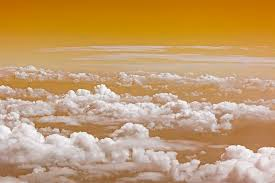

In [9]:
h,w,c = original_cloud_dataset[0].shape
original_cloud_dataset[0][:,:]

array([[[183, 108,   0],
        [183, 108,   0],
        [184, 109,   1],
        ...,
        [194, 114,   1],
        [194, 114,   1],
        [194, 114,   1]],

       [[183, 108,   0],
        [184, 109,   0],
        [185, 110,   0],
        ...,
        [194, 114,   0],
        [194, 114,   0],
        [194, 114,   0]],

       [[185, 110,   0],
        [185, 110,   0],
        [185, 110,   0],
        ...,
        [195, 115,   0],
        [195, 115,   0],
        [195, 115,   0]],

       ...,

       [[170, 143, 129],
        [167, 141, 126],
        [166, 140, 123],
        ...,
        [189, 156, 147],
        [183, 147, 135],
        [172, 133, 119]],

       [[160, 134, 119],
        [158, 132, 116],
        [160, 133, 116],
        ...,
        [172, 136, 128],
        [167, 131, 118],
        [161, 122, 107]],

       [[156, 130, 114],
        [157, 131, 115],
        [161, 134, 117],
        ...,
        [166, 131, 121],
        [161, 125, 113],
        [155, 116, 102]]], dtype=uint8)
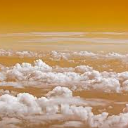

In [10]:
h,w,c = original_cloud_dataset[0].shape
centerX, centerY = w // 2, h // 2
k = (w if w < h else h) // 2
cv.resize(original_cloud_dataset[0][centerY - k : centerY + k, centerX - k : centerX + k], (128, 128))

array([[ 83,  83,  83, ...,  87,  87,  87],
       [ 83,  83,  83, ...,  88,  88,  88],
       [ 83,  83,  83, ...,  88,  88,  88],
       ...,
       [164, 165, 167, ..., 184, 180, 176],
       [168, 170, 173, ..., 169, 168, 166],
       [181, 181, 180, ..., 169, 171, 173]], dtype=uint8)
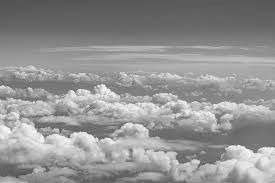

In [11]:
cv.cvtColor(original_cloud_dataset[0], cv.COLOR_BGR2GRAY)

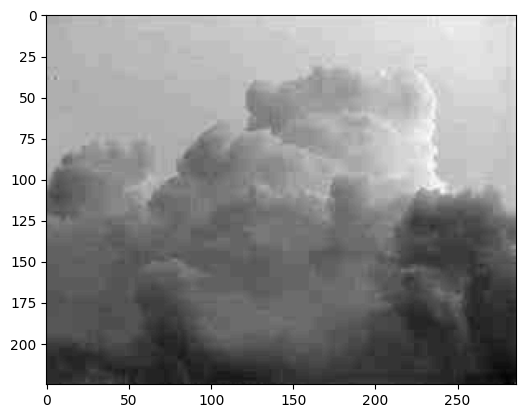

In [12]:
plt.imshow(cv.cvtColor(original_raincloud_dataset[0], cv.COLOR_BGR2GRAY), cmap='gray')

구름에 판단을 집중해야하기 때문에 나머지 배경의 색은 무시하는 게 좋음
따라서 RGB 채널에서 Gray 채널로 변경함
또한 3채널에서 1채널로 변경하므로 데이터 절약 및 학습 속도 향상을 기대할 수 있음

In [13]:
del original_raincloud_dataset, original_cloud_dataset

메모리 아끼기

In [14]:
def preprocessImage(img):
    h,w,c = img.shape
    centerX, centerY = w // 2, h // 2
    k = (w if w < h else h) // 2
    return cv.cvtColor(cv.resize(img[centerY - k : centerY + k, centerX - k : centerX + k], (128, 128)), cv.COLOR_RGB2GRAY)

In [15]:
original_cloud_dataset = np.array([
    preprocessImage(cv.imread(f'{DATASET_PATH}/Cloud/{name}')) / 255.
    for name in os.listdir('/content/datasets/Cloud')
])

In [16]:
original_cloud_dataset[3]

array([[0.32941176, 0.34901961, 0.36470588, ..., 0.35294118, 0.35686275,
        0.34901961],
       [0.34117647, 0.36470588, 0.36862745, ..., 0.35294118, 0.35686275,
        0.35294118],
       [0.33333333, 0.35294118, 0.35294118, ..., 0.35686275, 0.36078431,
        0.35294118],
       ...,
       [0.67843137, 0.67843137, 0.73333333, ..., 0.6745098 , 0.67058824,
        0.6745098 ],
       [0.71764706, 0.69803922, 0.72941176, ..., 0.6627451 , 0.65882353,
        0.66666667],
       [0.73333333, 0.74117647, 0.74509804, ..., 0.65490196, 0.65098039,
        0.65490196]])

In [17]:
original_raincloud_dataset = np.array([
    preprocessImage(cv.imread(f'{DATASET_PATH}/RainCloud/{name}')) / 255.
    for name in os.listdir('/content/datasets/RainCloud')
])

In [18]:
original_raincloud_dataset[4]

array([[0.11764706, 0.11764706, 0.11372549, ..., 0.47843137, 0.47843137,
        0.45490196],
       [0.11372549, 0.11764706, 0.10980392, ..., 0.58823529, 0.57647059,
        0.4745098 ],
       [0.10196078, 0.10980392, 0.11372549, ..., 0.54117647, 0.62352941,
        0.55686275],
       ...,
       [0.36862745, 0.38039216, 0.37254902, ..., 0.33333333, 0.29411765,
        0.25490196],
       [0.36078431, 0.36862745, 0.37647059, ..., 0.3372549 , 0.29803922,
        0.23529412],
       [0.34901961, 0.35686275, 0.36078431, ..., 0.31764706, 0.28235294,
        0.23921569]])

In [19]:
original_raincloud_dataset.shape, original_cloud_dataset.shape

((600, 128, 128), (600, 128, 128))

총 데이터 600 + 600 개가 있음

In [20]:
trainX = np.concatenate((original_cloud_dataset, original_raincloud_dataset))
trainY = np.concatenate((np.zeros(600), np.ones(600)))

In [21]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.2, random_state=111)

print("Train shapes:", trainX.shape, trainY.shape)
print("Test shapes:", testX.shape, testY.shape)


Train shapes: (960, 128, 128) (960,)
Test shapes: (240, 128, 128) (240,)


이제 학습 기기

In [22]:
import tensorflow as tf

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
model.fit(datagen.flow(trainX.reshape(960, 128, 128, 1), trainY, batch_size=32), epochs=200)

Epoch 1/200
30/30 [==============================] - 2s 50ms/step - loss: 0.2492 - accuracy: 0.9083
Epoch 2/200
30/30 [==============================] - 2s 50ms/step - loss: 0.2160 - accuracy: 0.9177
Epoch 3/200
30/30 [==============================] - 2s 60ms/step - loss: 0.2362 - accuracy: 0.9156
Epoch 4/200
30/30 [==============================] - 2s 79ms/step - loss: 0.2334 - accuracy: 0.9115
Epoch 5/200
30/30 [==============================] - 2s 59ms/step - loss: 0.2354 - accuracy: 0.9083
Epoch 6/200
30/30 [==============================] - 2s 65ms/step - loss: 0.2588 - accuracy: 0.9031
Epoch 7/200
30/30 [==============================] - 1s 48ms/step - loss: 0.2261 - accuracy: 0.9094
Epoch 8/200
30/30 [==============================] - 2s 51ms/step - loss: 0.2065 - accuracy: 0.9156
Epoch 9/200
30/30 [==============================] - 2s 50ms/step - loss: 0.2181 - accuracy: 0.9094
Epoch 10/200
30/30 [==============================] - 2s 65ms/step - loss: 0.2067 - accuracy: 0.9219

In [ ]:
_, accuracy = model.evaluate(testX, testY)
print(f'Accuracy: {int(accuracy*100)}%')

원할때 세이브

In [ ]:
import datetime

now = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
model_save_path = f'/content/drive/MyDrive/sdgsmodels/model_{now}.h5'

model.save(f'/content/drive/MyDrive/sdgsmodels/model_{now}.h5')
